In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("dataset/heart_disease.csv")

In [ ]:

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [ ]:
# Replace '?' with NaN and convert columns to numeric
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric, errors='coerce')

print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [ ]:
df = df.fillna(df.median())

In [8]:
# Create binary target: 0 = No Disease, 1 = Disease. Then drop original 'num'
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop('num', axis=1, inplace=True)

# Check target distribution
print(df['target'].value_counts())

target
0    164
1    139
Name: count, dtype: int64


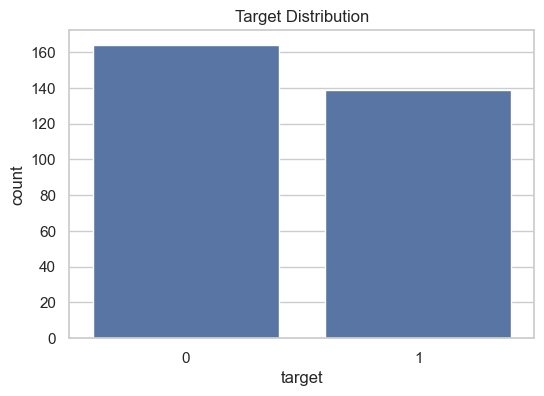

In [ ]:
# target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.show()

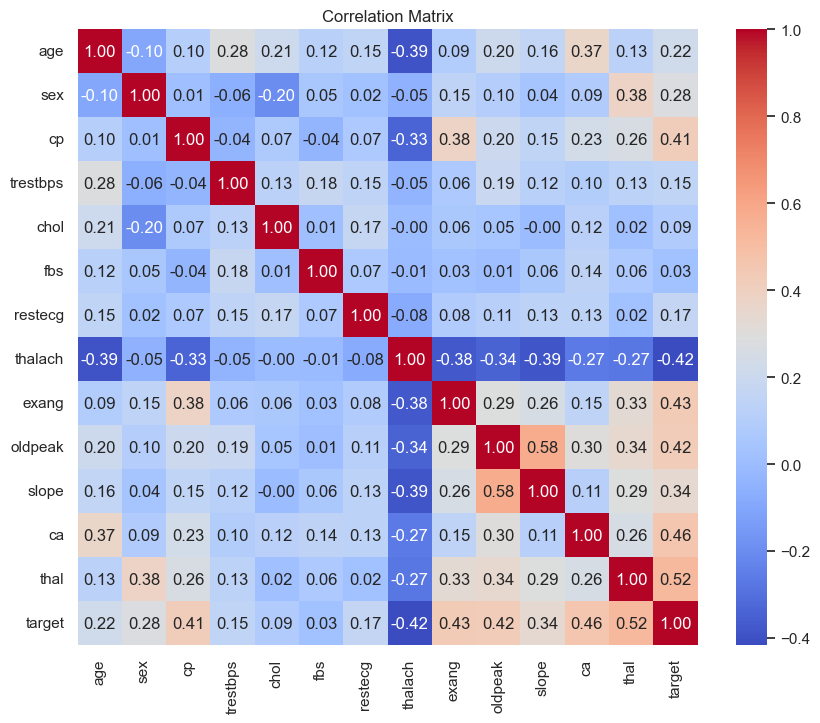

In [10]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Encoding for categorical variables
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6.0,thal_7.0
0,63,1,145,233,1,150,0,2.3,0.0,0,False,False,False,False,True,False,True,True,False
1,67,1,160,286,0,108,1,1.5,3.0,1,False,False,True,False,True,True,False,False,False
2,67,1,120,229,0,129,1,2.6,2.0,1,False,False,True,False,True,True,False,False,True
3,37,1,130,250,0,187,0,3.5,0.0,0,False,True,False,False,False,False,True,False,False
4,41,0,130,204,0,172,0,1.4,0.0,0,True,False,False,False,True,False,False,False,False


In [ ]:
# Split Data 
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (242, 18)
Test Shape: (61, 18)


In [14]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7377
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.74      0.78      0.76        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [15]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8852
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# For Logistic Regression, KNN, SVM, and ANN.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Apply PCA to reduce dimensionality while retaining 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Number of components selected:", X_train_pca.shape[1])

Number of components selected: 15


In [18]:
# Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_pca, y_train)
y_pred_lr = logreg.predict(X_test_pca)

acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")

Logistic Regression Accuracy: 0.8525


In [19]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {acc_knn:.4f}")

KNN Accuracy: 0.9016


In [ ]:
# Support Vector Machine (SVM) 
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_test_pca)

acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.4f}")

SVM Accuracy: 0.8197


In [ ]:
# Artificial Neural Network 
ann = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann.fit(X_train_pca, y_train)
y_pred_ann = ann.predict(X_test_pca)

acc_ann = accuracy_score(y_test, y_pred_ann)
print(f"ANN Accuracy: {acc_ann:.4f}")

ANN Accuracy: 0.8361


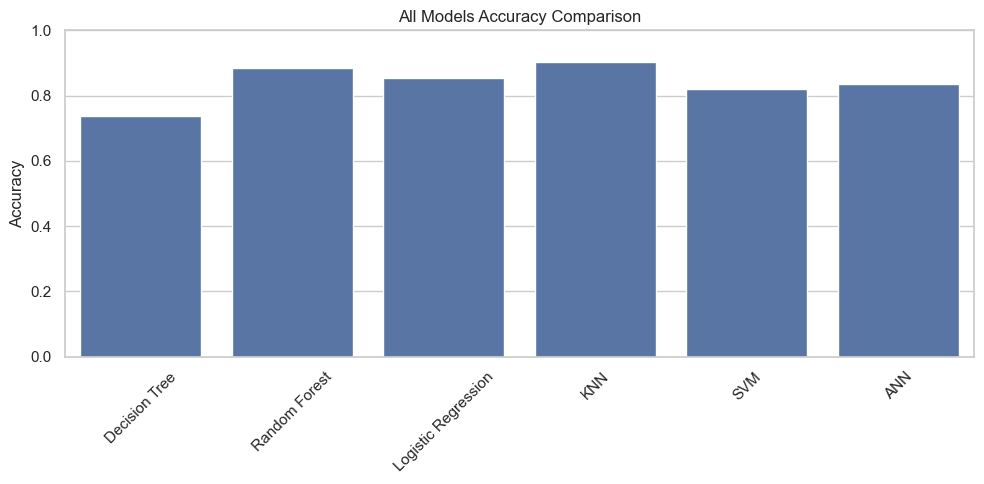

In [22]:
# Visual Comparison of All Models
results = {
    'Decision Tree': acc_dt,
    'Random Forest': acc_rf,
    'Logistic Regression': acc_lr,
    'KNN': acc_knn,
    'SVM': acc_svm,
    'ANN': acc_ann
}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('All Models Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()